In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
img = cv2.imread('dataset/Celebrity Faces Dataset/Brad Pitt/002_cc1b9701.jpg')

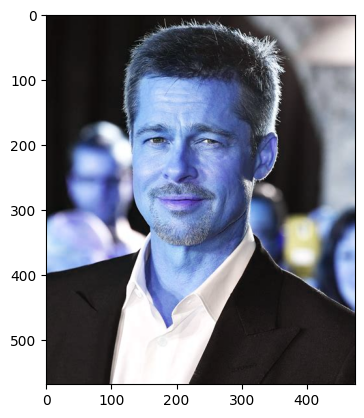

In [21]:
plt.imshow(img)

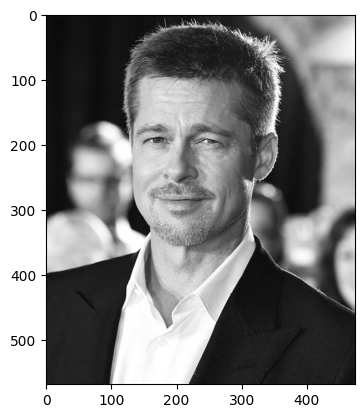

In [22]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow((gray_img), cmap='gray')

In [23]:
eyes_cascade = cv2.CascadeClassifier("server/haar_cacades/haarcascade_eye.xml")
faces_cascade = cv2.CascadeClassifier("server/haar_cacades/haarcascade_frontalface_alt2.xml")

In [24]:
cv2.destroyAllWindows()

In [25]:
def detect_face_and_eyes(path):
    img = cv2.imread(path)
    
    if img is None:
        return None
    
    faces = faces_cascade.detectMultiScale(img, 1.3, 5)
    
    for (x, y, w, h) in faces:
        img_face = cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 3)
        cropped_face = img_face[y:y + h, x:x + w]
        
        eyes = eyes_cascade.detectMultiScale(cropped_face)
        
        if len(eyes) >= 2:
            cropped_face_rgb = cv2.cvtColor(cropped_face, cv2.COLOR_BGR2RGB)
            return cv2.resize(cropped_face_rgb, (160, 160))
    return None
    

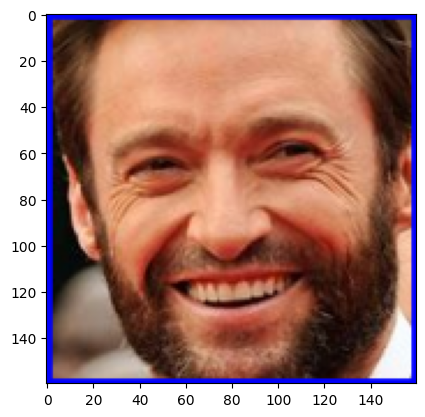

In [26]:
cropped_face = detect_face_and_eyes('dataset/Celebrity Faces Dataset/Hugh Jackman/001_9adc92c2.jpg')
plt.imshow(cropped_face)

In [27]:
dataset_path = './dataset/Celebrity Faces Dataset/'
cleaned_data_path = './cleaned_data/' 

In [28]:
import os
folder = []
for name in os.listdir(dataset_path):
    if os.path.isdir(os.path.join(dataset_path, name)):
        folder.append(dataset_path+name)

In [29]:
folder

['./dataset/Celebrity Faces Dataset/Brad Pitt',
 './dataset/Celebrity Faces Dataset/Hugh Jackman',
 './dataset/Celebrity Faces Dataset/Johnny Depp',
 './dataset/Celebrity Faces Dataset/Robert Downey Jr',
 './dataset/Celebrity Faces Dataset/Will Smith']

In [30]:
import shutil
if os.path.exists(cleaned_data_path):
    shutil.rmtree(cleaned_data_path)
os.makedirs(cleaned_data_path)

In [31]:
cropped_path = []
celeb_directories = {}

for celebrity_folder in folder:
    celeb_name = celebrity_folder.split('/')[-1]
    print("Processing images of:", celeb_name)
    if not os.path.exists(cleaned_data_path+celeb_name):
        os.makedirs(cleaned_data_path+celeb_name)
    count = 0
    for img_name in os.listdir(celebrity_folder):
        img_path = celebrity_folder + '/' + img_name
        cropped_face = detect_face_and_eyes(img_path)

        if cropped_face is not None:
            path_to_save = cleaned_data_path + celeb_name+'/' + celeb_name + str(count)+".png"
            cropped_path.append(path_to_save)
            cv2.imwrite(path_to_save, cropped_face)
            count += 1
            
    celeb_directories[celeb_name] = cropped_path
    cropped_path = []
        
   

Processing images of: Brad Pitt
Processing images of: Hugh Jackman
Processing images of: Johnny Depp
Processing images of: Robert Downey Jr
Processing images of: Will Smith


In [32]:
# encoding celebrities
encode_celebrities = {}
for idx, celebrity in enumerate(celeb_directories.keys()):
    encode_celebrities[celebrity] = idx
encode_celebrities

{'Brad Pitt': 0,
 'Hugh Jackman': 1,
 'Johnny Depp': 2,
 'Robert Downey Jr': 3,
 'Will Smith': 4}

In [33]:
# --- Load FaceNet and Prepare Embeddings ---
from keras_facenet import FaceNet
import os
import cv2
import numpy as np
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

# Load FaceNet model
embedder = FaceNet()

In [34]:
import logging

logging.basicConfig(level=logging.ERROR)

# Prepare embeddings and labels using the new RGB face function
X_embeds = []
y_labels = []
label_map = {}
label_count = 0

for celeb in os.listdir('cleaned_data'):
    celeb_path = os.path.join('cleaned_data', celeb)
    if os.path.isdir(celeb_path):
        if celeb not in label_map:
            label_map[celeb] = label_count
            label_count += 1
        for img_name in os.listdir(celeb_path):
            img_path = os.path.join(celeb_path, img_name)
            img_rgb = detect_face_and_eyes(img_path)
            if img_rgb is not None:
                embed = embedder.embeddings([img_rgb])[0]
                X_embeds.append(embed)
                y_labels.append(label_map[celeb])

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━

In [35]:
X_embeds = np.array(X_embeds)
y_labels = np.array(y_labels)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_embeds, y_labels, test_size=0.2, random_state=42)

In [36]:
num_classes = len(label_map)
model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')
])

In [39]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=16,
    validation_data=(X_test, y_test),
    callbacks=[early_stop],
    verbose=2
 )

Epoch 1/30
8/8 - 2s - 210ms/step - accuracy: 0.9917 - loss: 0.0408 - val_accuracy: 0.8065 - val_loss: 0.6824
Epoch 2/30
8/8 - 0s - 10ms/step - accuracy: 0.9917 - loss: 0.0630 - val_accuracy: 0.8065 - val_loss: 0.5985
Epoch 3/30
8/8 - 0s - 10ms/step - accuracy: 0.9917 - loss: 0.0322 - val_accuracy: 0.8065 - val_loss: 0.5054
Epoch 4/30
8/8 - 0s - 10ms/step - accuracy: 1.0000 - loss: 0.0235 - val_accuracy: 0.8710 - val_loss: 0.4402
Epoch 5/30
8/8 - 0s - 11ms/step - accuracy: 0.9917 - loss: 0.0380 - val_accuracy: 0.9355 - val_loss: 0.3801
Epoch 6/30
8/8 - 0s - 10ms/step - accuracy: 0.9669 - loss: 0.0640 - val_accuracy: 0.9355 - val_loss: 0.3389
Epoch 7/30
8/8 - 0s - 10ms/step - accuracy: 1.0000 - loss: 0.0123 - val_accuracy: 0.9355 - val_loss: 0.2938
Epoch 8/30
8/8 - 0s - 10ms/step - accuracy: 0.9917 - loss: 0.0313 - val_accuracy: 0.9355 - val_loss: 0.2528
Epoch 9/30
8/8 - 0s - 10ms/step - accuracy: 0.9917 - loss: 0.0491 - val_accuracy: 0.9677 - val_loss: 0.2259
Epoch 10/30
8/8 - 0s - 11ms

In [38]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {acc:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.8387 - loss: 0.7787
Test accuracy: 0.84


In [44]:
# --- Function to predict and return all class confidences ---
def predict_face_confidences(image_path, embedder, model, label_map):
    img_rgb = detect_face_and_eyes(image_path)
    if img_rgb is None:
        print("Image not found or face/eyes not detected.")
        return None
    
    embed = embedder.embeddings([img_rgb])[0]
    pred = model.predict(np.expand_dims(embed, axis=0))[0]
    label_map_rev = {v: k for k, v in label_map.items()}
    confidences = {label_map_rev[idx]: float(conf) for idx, conf in enumerate(pred)}

    return confidences

In [ ]:
prediction = predict_face_confidences('jackman-hugh.jpg', embedder, model, label_map) 
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
{'Brad Pitt': 0.012918025255203247, 'Hugh Jackman': 0.9792881608009338, 'Johnny Depp': 0.005172634031623602, 'Robert Downey Jr': 0.0017672505928203464, 'Will Smith': 0.0008539632544852793} ++++
{'Brad Pitt': 0.012918025255203247, 'Hugh Jackman': 0.9792881608009338, 'Johnny Depp': 0.005172634031623602, 'Robert Downey Jr': 0.0017672505928203464, 'Will Smith': 0.0008539632544852793} ++++
